In [58]:
# import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import regex
import re
import string
from nltk.corpus import stopwords
import nltk
from scipy import stats
from scipy.stats import randint
from nltk import word_tokenize, sent_tokenize
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from collections import Counter
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential, Input, Model, layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, AveragePooling2D, TextVectorization
from tensorflow.keras.layers import Dense, Flatten, Softmax, Dropout, Embedding, SimpleRNN, LSTM, GRU, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling, RandomWidth, RandomHeight, Lambda
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from sklearn.model_selection import RandomizedSearchCV
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from sklearn.preprocessing import LabelEncoder
import keras
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import Embedding
from tensorflow import keras
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from keras.layers import Dropout

In [59]:
# load the data and create a dataframe
filename = "all_tickets_processed_improved_v3.csv"
df = pd.read_csv(filename)

In [60]:
# display the dataframe
df

,Document,Topic_group
0,connection with icon icon dear please setup ic...,Hardware
1,work experience user work experience user hi w...,Access
2,requesting for meeting requesting meeting hi p...,Hardware
3,reset passwords for external accounts re expir...,Access
4,mail verification warning hi has got attached ...,Miscellaneous
...,...,...
47832,git space for a project issues with adding use...,Access
47833,error sent july error hi guys can you help out...,Miscellaneous
47834,connection issues sent tuesday july connection...,Hardware
47835,error cube reports sent tuesday july error hel...,HR Support


In [61]:
# check for null values in the data
df.isnull().sum()

Document       0
Topic_group    0
dtype: int64

In [62]:
# check number of unique values
df['Topic_group'].unique()

array(['Hardware', 'Access', 'Miscellaneous', 'HR Support', 'Purchase',
       'Administrative rights', 'Storage', 'Internal Project'],
      dtype=object)

In [63]:
# check the total entries for each unique value in the target column
df['Topic_group'].value_counts()

Topic_group
Hardware                 13617
HR Support               10915
Access                    7125
Miscellaneous             7060
Storage                   2777
Purchase                  2464
Internal Project          2119
Administrative rights     1760
Name: count, dtype: int64

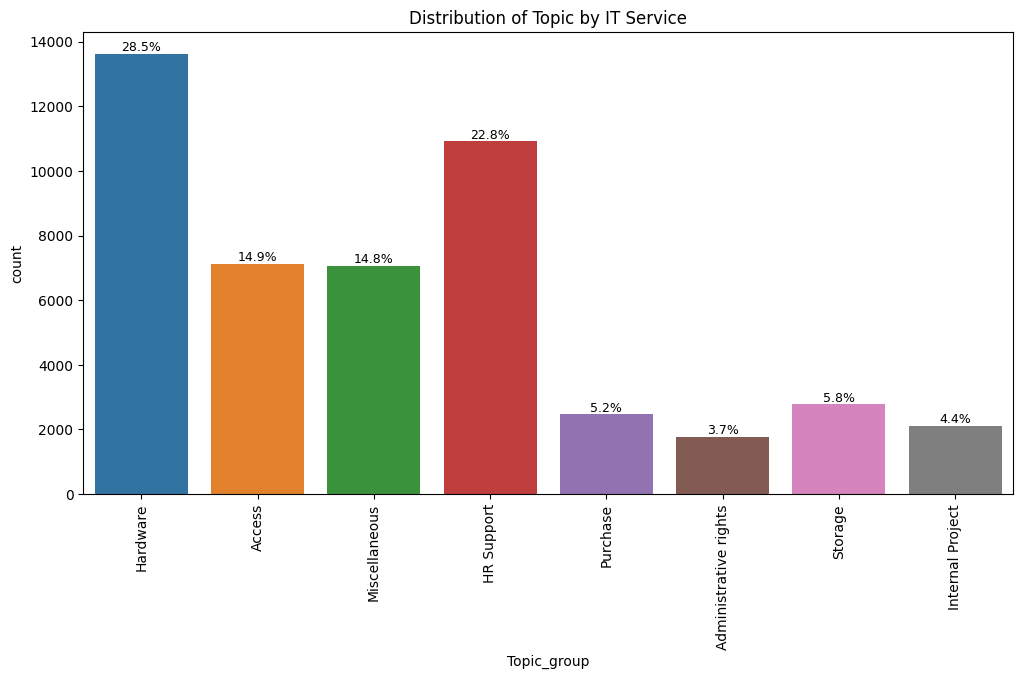

In [64]:
# plot the target group
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='Topic_group', ax=ax)

plt.title('Distribution of Topic by IT Service')
plt.xticks(rotation=90)
total = len(df)

# Add percentage of each category
for p in ax.patches:
    percentage = (p.get_height() / total) * 100
    ax.annotate('{:.1f}%'.format(percentage),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black')

plt.show()

C:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


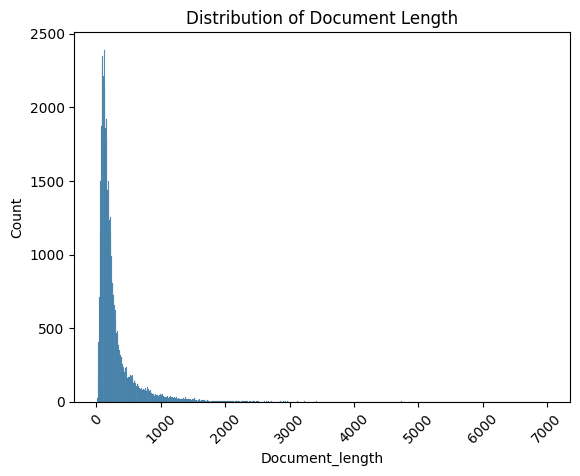

In [65]:
# plot the distribution in the document length
df['Document_length']= df['Document'].apply(lambda x: len(str(x))if pd.notnull(x) else 0)
sns.histplot(df['Document_length'])
plt.title('Distribution of Document Length')
plt.xticks(rotation=45)
plt.show()

In [66]:
# idsplay the dataframe
df

,Document,Topic_group,Document_length
0,connection with icon icon dear please setup ic...,Hardware,111
1,work experience user work experience user hi w...,Access,124
2,requesting for meeting requesting meeting hi p...,Hardware,93
3,reset passwords for external accounts re expir...,Access,948
4,mail verification warning hi has got attached ...,Miscellaneous,115
...,...,...,...
47832,git space for a project issues with adding use...,Access,889
47833,error sent july error hi guys can you help out...,Miscellaneous,126
47834,connection issues sent tuesday july connection...,Hardware,398
47835,error cube reports sent tuesday july error hel...,HR Support,372


## Text Preparation

#### Word cloud

In [67]:
# all_text = df['Document'].str.split().sum()

# word_counts = Counter(all_text)

# common_words = [word for word, count in word_counts.most_common(20)] + ["we", "by", "to", "have", "did", "your"] # Adjust 10 to specify the number of common words

# max_word_counts_by_group = {}

# for group_name, group_data in df.groupby('Topic_group')['Document']:
#     tokenized_text = group_data.str.split().sum()

#     word_counts = Counter(tokenized_text)

#     for common_word in common_words:
#         del word_counts[common_word]

#     top_10_words = word_counts.most_common(10)

#     max_word_counts_by_group[group_name] = top_10_words

# print("Top 10 most common words (excluding common words) for each group:")
# for group_name, top_10_words in max_word_counts_by_group.items():
#     print(f"Group: {group_name}")
#     for word, count in top_10_words:
#         print(f"{word}: {count}")
#     print()

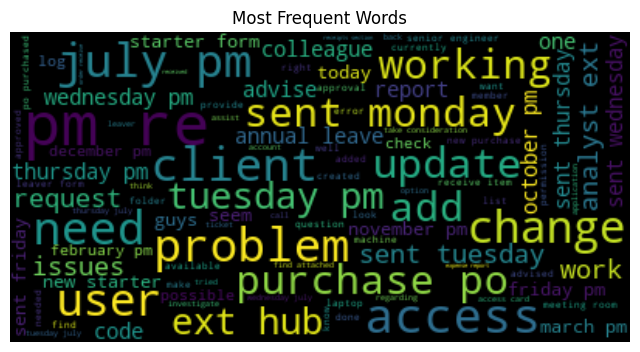

In [68]:
def create_wordcloud_from_dataframe(dataframe, column_name, words_to_remove=None):
  # Concatenate all text from the specified column
  text = dataframe[column_name].str.cat(sep=" ")
  text = text.lower()

  # Remove specified words if provided
  if words_to_remove:
    text = remove_words(text, words_to_remove)

    # Generate the word cloud
  wordcloud = WordCloud(max_font_size=40).generate(text)

    # Plot the word cloud
  plt.figure(figsize=(8, 8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title("Most Frequent Words")
  plt.show()

def remove_words(text, words_to_remove):
  return " ".join([word for word in text.split() if word not in words_to_remove])

words_to_remove = ["ga", "kind", "hello", "please", "let", "help", "best", "regards", "icon", "dear", "per", "hi", "thanks", "thank", "importance", "high", "issue", "ab", "abc"]
df["Document"] = df["Document"].apply(remove_words, args=(words_to_remove,))
create_wordcloud_from_dataframe(df, "Document")

Lower Case

In [69]:
df['Document'] = df['Document'].apply(lambda x: x.lower())
df.head()

,Document,Topic_group,Document_length
0,connection with setup engineers other details ...,Hardware,111
1,work experience user work experience user work...,Access,124
2,requesting for meeting requesting meeting foll...,Hardware,93
3,reset passwords for external accounts re expir...,Access,948
4,mail verification warning has got attached add...,Miscellaneous,115


#### Remove emojies if any

In [70]:
# function to check if there are emojies
def has_emoji(text):

  emoji_pattern = regex.compile(r'\p{Emoji}', flags=regex.UNICODE)
  return emoji_pattern.search(text) is not None

has_emojis = df['Document'].apply(has_emoji)

In [71]:
has_emojis

0        False
1        False
2        False
3        False
4        False
         ...  
47832    False
47833    False
47834    False
47835    False
47836    False
Name: Document, Length: 47837, dtype: bool

In [72]:
has_emojis.sum()

0

### Exclude URLs in the dataframe

In [73]:
# remove URLs from the data
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

df["Document"] = df["Document"].apply(remove_url)
df.head()

,Document,Topic_group,Document_length
0,connection with setup engineers other details ...,Hardware,111
1,work experience user work experience user work...,Access,124
2,requesting for meeting requesting meeting foll...,Hardware,93
3,reset passwords for external accounts re expir...,Access,948
4,mail verification warning has got attached add...,Miscellaneous,115


#### Excluding Punctuations

In [74]:
# create a variable for punctuations
punctua =string.punctuation
def punctua_remove(text):
  return text.translate(str.maketrans('', '', punctua))

df["Document"] = df["Document"].apply(punctua_remove)
df.head()

,Document,Topic_group,Document_length
0,connection with setup engineers other details ...,Hardware,111
1,work experience user work experience user work...,Access,124
2,requesting for meeting requesting meeting foll...,Hardware,93
3,reset passwords for external accounts re expir...,Access,948
4,mail verification warning has got attached add...,Miscellaneous,115


In [75]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\805925.ADIR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

df["Document"] = df["Document"].apply(remove_stopwords)
df.head()

,Document,Topic_group,Document_length
0,connection setup engineers details needed lead,Hardware,111
1,work experience user work experience user work...,Access,124
2,requesting meeting requesting meeting follow e...,Hardware,93
3,reset passwords external accounts expire days ...,Access,948
4,mail verification warning got attached address...,Miscellaneous,115


In [77]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\805925.ADIR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
def tokenize_text(text):
    sentences = sent_tokenize(text)
    words = [word_tokenize(sentence) for sentence in sentences]
    return words

df['Document_tokenized_text'] = df['Document'].apply(lambda x: tokenize_text(x))
df.head()


,Document,Topic_group,Document_length,Document_tokenized_text
0,connection setup engineers details needed lead,Hardware,111,"[[connection, setup, engineers, details, neede..."
1,work experience user work experience user work...,Access,124,"[[work, experience, user, work, experience, us..."
2,requesting meeting requesting meeting follow e...,Hardware,93,"[[requesting, meeting, requesting, meeting, fo..."
3,reset passwords external accounts expire days ...,Access,948,"[[reset, passwords, external, accounts, expire..."
4,mail verification warning got attached address...,Miscellaneous,115,"[[mail, verification, warning, got, attached, ..."


In [79]:
df["Document_tokenized_text"][0][0]

['connection', 'setup', 'engineers', 'details', 'needed', 'lead']

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47837 entries, 0 to 47836
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Document                 47837 non-null  object
 1   Topic_group              47837 non-null  object
 2   Document_length          47837 non-null  int64 
 3   Document_tokenized_text  47837 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [81]:
df['Topic_group'].unique()

array(['Hardware', 'Access', 'Miscellaneous', 'HR Support', 'Purchase',
       'Administrative rights', 'Storage', 'Internal Project'],
      dtype=object)

In [82]:
df_encoded = pd.get_dummies(df['Topic_group'])
df = pd.concat([df, df_encoded], axis=1)
df.head()

,Document,Topic_group,Document_length,Document_tokenized_text,Access,Administrative rights,HR Support,Hardware,Internal Project,Miscellaneous,Purchase,Storage
0,connection setup engineers details needed lead,Hardware,111,"[[connection, setup, engineers, details, neede...",False,False,False,True,False,False,False,False
1,work experience user work experience user work...,Access,124,"[[work, experience, user, work, experience, us...",True,False,False,False,False,False,False,False
2,requesting meeting requesting meeting follow e...,Hardware,93,"[[requesting, meeting, requesting, meeting, fo...",False,False,False,True,False,False,False,False
3,reset passwords external accounts expire days ...,Access,948,"[[reset, passwords, external, accounts, expire...",True,False,False,False,False,False,False,False
4,mail verification warning got attached address...,Miscellaneous,115,"[[mail, verification, warning, got, attached, ...",False,False,False,False,False,True,False,False


In [83]:

X = df['Document'].values
y = np.argmax(df[['Hardware', 'Access', 'Miscellaneous', 'HR Support','Purchase', 'Administrative rights','Storage', 'Internal Project' ]].values, axis=1)

In [84]:
X

array(['connection setup engineers details needed lead',
       'work experience user work experience user work experience student coming next name much appreciate duration',
       'requesting meeting requesting meeting follow equipments cable pc cord plug',
       ...,
       'connection issues sent tuesday july connection issues connection issues working client side link connection type cable en using applications excel word explorer slow delays moving mouse clicking constant problem today slower usual impacting work colleagues working problem previously reported advise senior analyst ext',
       'error cube reports sent tuesday july error guys received error trying export reports status cube reports cannot run without web components installed browser learn installing contact technical possible need process overtime hours booked buy colleagues assistant ext ale address street center',
       'running extensions advised running extension least seems extension available range anythin

In [85]:
X.shape

(47837,)

In [86]:
y.shape

(47837,)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("y_train:")
print(y_train)
print("y_test:")
print(y_test)


Shape of X_train: (38269,)
Shape of X_test: (9568,)
y_train:
[2 0 1 ... 0 3 2]
y_test:
[2 0 0 ... 4 0 3]


## Models

In [88]:
method = {}

In [89]:
# function to evalute the model
def model_performance(y_train, y_pred_train, y_test, y_pred_test):

  # Model Performance for the train split set
  train_accuracy = accuracy_score(y_train, y_pred_train)
  train_classification_rep = classification_report(y_train, y_pred_train)
  print('Report on Training Dataset\n')
  print("Accuracy : ", train_accuracy)
  print("Classification Report :\n", train_classification_rep)

  # Model Performance for the test split set
  test_accuracy = accuracy_score(y_test, y_pred_test)
  test_classification_rep = classification_report(y_test, y_pred_test)

  print('Report on Test Dataset\n')
  print("Accuracy : ", test_accuracy)
  print("Classification Report:\n ", test_classification_rep)

  # Confusion Matrix for the test dat
  cm = confusion_matrix(y_train, y_pred_train)
  labels = ["Fatal", "Serious", "Slight"]
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
  plt.title("Confusion Matrix for the Train Split Set")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

  print('')
  # Confusion Matrix for the test data
  cm = confusion_matrix(y_test, y_pred_test)
  labels = ["Fatal", "Serious", "Slight"]
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
  plt.title("Confusion Matrix for the Test Split Set")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

  return test_accuracy

In [90]:
def NB_model(X_train, y_train, X_test, y_test, vectorizer =False):

  # Training a Random Forest Classifier
  if vectorizer == True:
    model = make_pipeline(TfidfVectorizer(), MultinomialNB())
  else:
    model = MultinomialNB()
  model.fit(X_train, y_train)
  # Making predictions on the train split set
  y_pred_train = model.predict(X_train)
  # Making predictions on the test split set
  y_pred_test = model.predict(X_test)

  #evalute the model
  test_accuracy= model_performance(y_train, y_pred_train, y_test, y_pred_test)

  return test_accuracy

Report on Training Dataset

Accuracy :  0.7672789986673286
Classification Report :
               precision    recall  f1-score   support

           0       0.65      0.93      0.77     10860
           1       0.90      0.76      0.82      5671
           2       0.84      0.70      0.76      5658
           3       0.76      0.81      0.78      8779
           4       0.98      0.83      0.90      1956
           5       0.99      0.18      0.31      1396
           6       0.98      0.59      0.74      2228
           7       0.99      0.42      0.59      1721

    accuracy                           0.77     38269
   macro avg       0.89      0.65      0.71     38269
weighted avg       0.80      0.77      0.76     38269

Report on Test Dataset

Accuracy :  0.7425794314381271
Classification Report:
                precision    recall  f1-score   support

           0       0.64      0.90      0.75      2757
           1       0.89      0.72      0.80      1454
           2       0.7

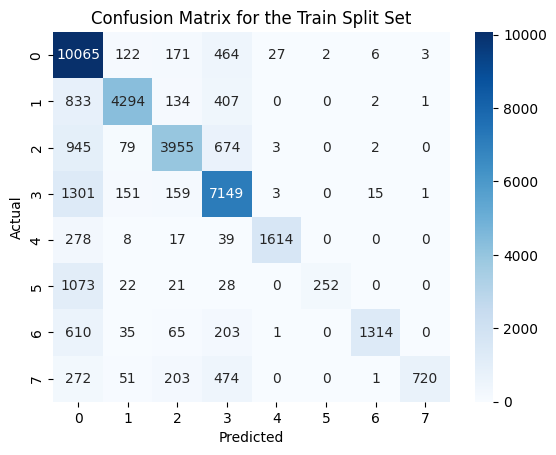

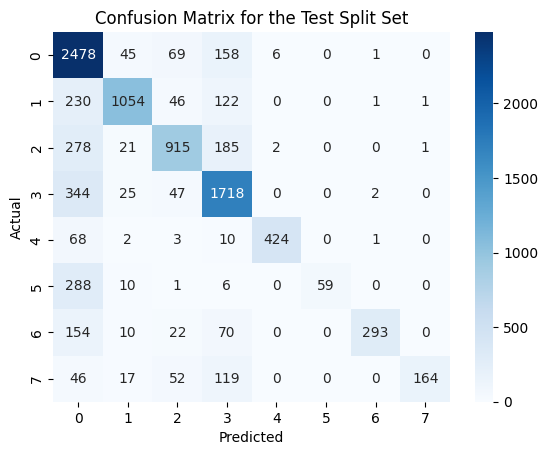

In [91]:
nb_accuracy = NB_model(X_train, y_train, X_test, y_test, vectorizer= True)


In [92]:
y_train_series = pd.Series(y_train)

print(y_train_series.value_counts())

0    10860
3     8779
1     5671
2     5658
6     2228
4     1956
7     1721
5     1396
Name: count, dtype: int64


In [93]:
def nb_model_tuned(X_train, y_train, X_test, y_test, vectorizer = False):
    # Define the pipeline
    if vectorizer == True:
      model = make_pipeline(TfidfVectorizer(), MultinomialNB())
      param_dist = {'tfidfvectorizer__max_df': [0.5, 0.75, 1.0],
                    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
                    'multinomialnb__alpha': [0.1, 0.5, 1.0, 2.0]}
    else:
      model = MultinomialNB()
      # Define the parameter distribution for MultinomialNB
      param_dist = {
          'alpha': [0.1, 0.5, 1.0, 2.0]
      }

    # Increase the number of iterations to better explore the parameter space
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42, verbose=1)

    # Fit the model using RandomizedSearchCV
    random_search.fit(X_train, y_train)
    print('Best Score:', random_search.best_score_)
    print('Best Params:', random_search.best_params_)

    # Best estimator found by RandomizedSearchCV
    best_model = random_search.best_estimator_

    # Making predictions on the training and test sets
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    # Evaluate the model
    test_accuracy = accuracy_score(y_test, y_pred_test)

    return test_accuracy

### Apply SMOTE

In [94]:
# Apply vectorizer
X_trans = X
tf = TfidfVectorizer()
X_trans = tf.fit_transform(X_trans)

In [95]:
# check the datatype of vectorised X_transformed
X_trans

<47837x12186 sparse matrix of type '<class 'numpy.float64'>'
	with 1054621 stored elements in Compressed Sparse Row format>

In [96]:
# function for SMOTE
def apply_smote(X, y):

  # tfidf = TfidfVectorizer()
  # X_tfidf = tfidf.fit_transform(X)
  smote = SMOTE(random_state=42)
  X_resampled, y_resampled = smote.fit_resample(X, y)


  return X_resampled, y_resampled

# Applying SMOTE to the dataset
X_resampled, y_resampled = apply_smote(X_trans, y)



In [97]:
  # Convert y_resampled to a Pandas Series
y_resampled_series = pd.Series(y_resampled)
y_series = pd.Series(y)
# Printing the class distribution before and after SMOTE
print("Class distribution before SMOTE:", y_series.value_counts(),"\n")
print("Class distribution after SMOTE:", y_resampled_series.value_counts())


Class distribution before SMOTE: 0    13617
3    10915
1     7125
2     7060
6     2777
4     2464
7     2119
5     1760
Name: count, dtype: int64 

Class distribution after SMOTE: 0    13617
1    13617
2    13617
3    13617
4    13617
5    13617
6    13617
7    13617
Name: count, dtype: int64


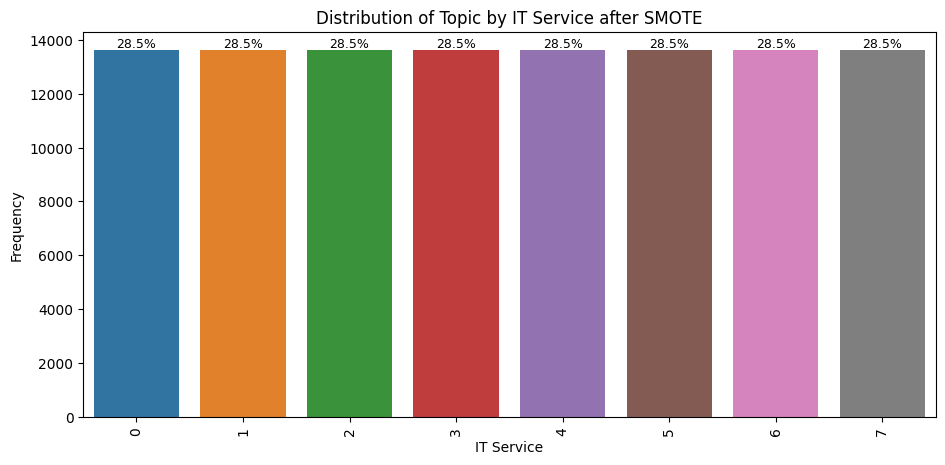

In [98]:
# plot the target group
fig, ax = plt.subplots(figsize=(11, 5))
sns.countplot( x=y_resampled_series, ax=ax)

plt.title('Distribution of Topic by IT Service after SMOTE')
plt.xticks(rotation=90)
plt.xlabel('IT Service')
plt.ylabel('Frequency')
total = len(df)

# Add percentage of each category
for p in ax.patches:
    percentage = (p.get_height() / total) * 100
    ax.annotate('{:.1f}%'.format(percentage),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black')

plt.show()

In [99]:
# function for SMOTE preprocessing
def smote_preprocessing(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


  return X_train, X_test, y_train, y_test

X_train_smote, X_test_smote, y_train_smote, y_test_smote = smote_preprocessing(X_resampled, y_resampled)

Report on Training Dataset

Accuracy :  0.8733189516684261
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.71      0.75     10860
           1       0.88      0.87      0.87     10881
           2       0.82      0.86      0.84     10843
           3       0.86      0.73      0.79     10800
           4       0.98      0.94      0.96     10902
           5       0.86      0.94      0.90     10866
           6       0.90      0.96      0.93     10989
           7       0.90      0.96      0.93     11007

    accuracy                           0.87     87148
   macro avg       0.87      0.87      0.87     87148
weighted avg       0.87      0.87      0.87     87148

Report on Test Dataset

Accuracy :  0.8620341472370112
Classification Report:
                precision    recall  f1-score   support

           0       0.76      0.69      0.72      2757
           1       0.86      0.86      0.86      2736
           2       0.8

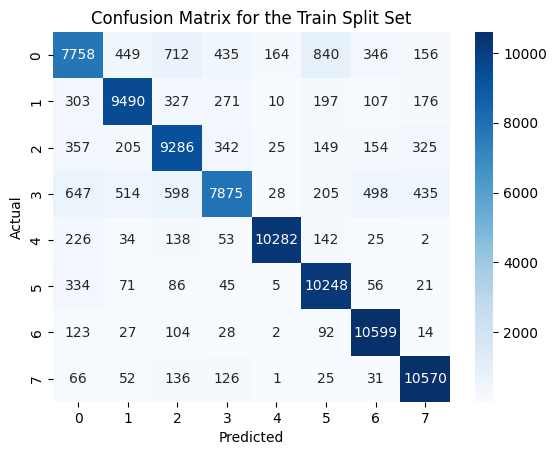

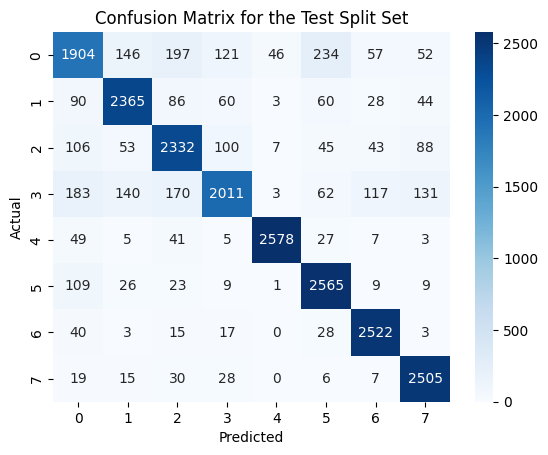

In [100]:
nb_smote_accuracy = NB_model(X_train_smote, y_train_smote, X_test_smote, y_test_smote)
method['Naive Bayes: SMOTE'] = nb_smote_accuracy * 100

In [101]:
nb_tuned_smote_accuracy= nb_model_tuned(X_train_smote, y_train_smote, X_test_smote, y_test_smote)
method['Naive Bayes: SMOTE Tuned'] = nb_tuned_smote_accuracy * 100

C:\Program Files\Python311\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Score: 0.8621884529997239
Best Params: {'alpha': 0.1}


In [102]:
def rf_model(X_train, y_train, X_test, y_test, vectorizer= False):

  # Training a Random Forest Classifier
  if vectorizer == True:
    model = make_pipeline(TfidfVectorizer(), RandomForestClassifier(random_state=42))
  else:
    model = RandomForestClassifier(random_state=42)
  model.fit(X_train, y_train)
  # Making predictions on the train split set
  y_pred_train = model.predict(X_train)
  # Making predictions on the test split set
  y_pred_test = model.predict(X_test)

  #evalute the model
  test_accuracy= model_performance(y_train, y_pred_train, y_test, y_pred_test)

  return test_accuracy

Report on Training Dataset

Accuracy :  0.9999477383783218
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10860
           1       1.00      1.00      1.00      5671
           2       1.00      1.00      1.00      5658
           3       1.00      1.00      1.00      8779
           4       1.00      1.00      1.00      1956
           5       1.00      1.00      1.00      1396
           6       1.00      1.00      1.00      2228
           7       1.00      1.00      1.00      1721

    accuracy                           1.00     38269
   macro avg       1.00      1.00      1.00     38269
weighted avg       1.00      1.00      1.00     38269

Report on Test Dataset

Accuracy :  0.8477215719063546
Classification Report:
                precision    recall  f1-score   support

           0       0.78      0.89      0.83      2757
           1       0.91      0.89      0.90      1454
           2       0.8

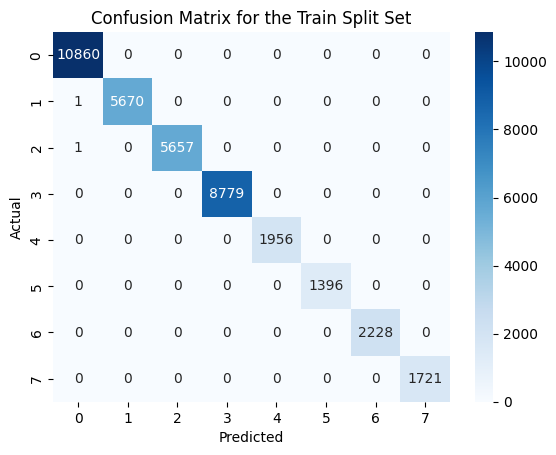

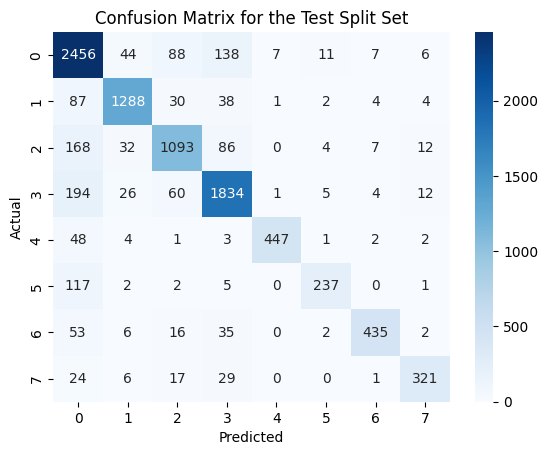

In [103]:
# run and evaluate the model
rf_accuracy = rf_model(X_train, y_train,X_test, y_test, vectorizer = True)

Report on Training Dataset

Accuracy :  0.9999770505347225
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10860
           1       1.00      1.00      1.00     10881
           2       1.00      1.00      1.00     10843
           3       1.00      1.00      1.00     10800
           4       1.00      1.00      1.00     10902
           5       1.00      1.00      1.00     10866
           6       1.00      1.00      1.00     10989
           7       1.00      1.00      1.00     11007

    accuracy                           1.00     87148
   macro avg       1.00      1.00      1.00     87148
weighted avg       1.00      1.00      1.00     87148

Report on Test Dataset

Accuracy :  0.941114374885258
Classification Report:
                precision    recall  f1-score   support

           0       0.87      0.81      0.84      2757
           1       0.94      0.96      0.95      2736
           2       0.90

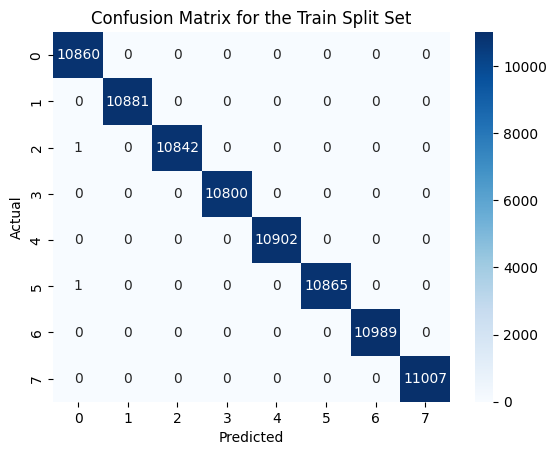

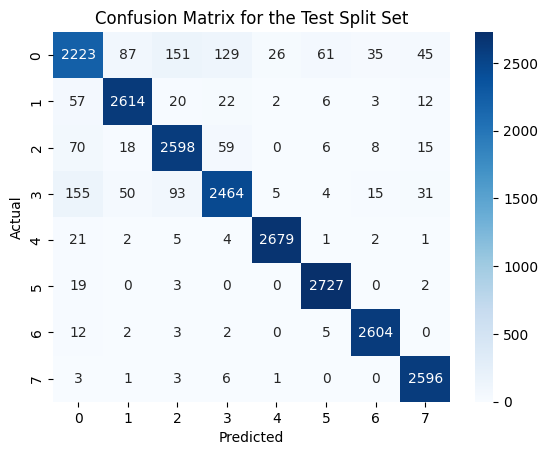

In [104]:
rf_smote_accuracy = rf_model(X_train_smote, y_train_smote, X_test_smote, y_test_smote)
method['R. Forest: SMOTE'] = rf_smote_accuracy * 100

In [105]:
def rf_model_tuned(X_train, y_train, X_test, y_test, vectorizer = False):
    # Define the pipeline
    if vectorizer == True:
      model = make_pipeline(TfidfVectorizer(), RandomForestClassifier(random_state=42))
    else:
      model = RandomForestClassifier(random_state=42)

    # Define the parameter distribution for MultinomialNB
    param_dist = {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]

    }

    # Perform randomized search
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=2, cv=2, scoring='accuracy', random_state=42, verbose=1)

    # Fit the model using RandomizedSearchCV
    random_search.fit(X_train, y_train)
    print('Best Score:', random_search.best_score_)
    print('Best Params:', random_search.best_params_)

    # Best estimator found by RandomizedSearchCV
    best_model = random_search.best_estimator_

    # Making predictions on the training and test sets
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    # Evaluate the model
    test_accuracy = accuracy_score(y_test, y_pred_test)

    return test_accuracy

In [106]:
rf_tuned_smote_accuracy= rf_model_tuned(X_train_smote, y_train_smote, X_test_smote, y_test_smote)
method['R. Forest: SMOTE Tuned'] = rf_tuned_smote_accuracy * 100

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best Score: 0.8940423188139717
Best Params: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


In [107]:
print("X_train size:", X_train.shape)
print("y_train size:", y_train.shape)
print("X_test size:", X_test.shape)
print("y_test size:", y_test.shape)


X_train size: (38269,)
y_train size: (38269,)
X_test size: (9568,)
y_test size: (9568,)


## DEEP LEARNING MODELS

In [108]:
# Using LDA to find coherence score of esch target group
def calculate_coherence_scores(df):
  tokenized_docs = [doc.split() for doc in df['Document']]
  dictionary = corpora.Dictionary(tokenized_docs)
  num_topics = len(df['Topic_group'].unique())
  coherence_scores_per_topic_group = {}

  for topic_group in df['Topic_group'].unique():

    docs_in_topic_group = [doc for doc, group in zip(tokenized_docs, df['Topic_group']) if group == topic_group]
    corpus_topic_group = [dictionary.doc2bow(doc) for doc in docs_in_topic_group]
    lda_model_topic_group = LdaModel(corpus_topic_group, num_topics=num_topics, id2word=dictionary, random_state=42)
    coherence_model_lda_topic_group = CoherenceModel(model=lda_model_topic_group, texts=docs_in_topic_group, dictionary=dictionary, coherence='c_v')
    coherence_score_topic_group = coherence_model_lda_topic_group.get_coherence()
    coherence_scores_per_topic_group[topic_group] = coherence_score_topic_group

  return coherence_scores_per_topic_group

coherence_scores = calculate_coherence_scores(df)
# print the scores with the target group
for topic_group, coherence_score in coherence_scores.items():
    print(f"Topic Group: {topic_group}")
    print(f"Coherence Score: {coherence_score}")


Topic Group: Hardware
Coherence Score: 0.39840468121472106
Topic Group: Access
Coherence Score: 0.3531068861304475
Topic Group: Miscellaneous
Coherence Score: 0.37923002543622397
Topic Group: HR Support
Coherence Score: 0.4462350797463392
Topic Group: Purchase
Coherence Score: 0.5571537193891636
Topic Group: Administrative rights
Coherence Score: 0.37409801573887874
Topic Group: Storage
Coherence Score: 0.26073517342069125
Topic Group: Internal Project
Coherence Score: 0.3697623080462108


In [109]:
# Checking the data balance
print(df['Topic_group'].value_counts(normalize=True)*100)

Topic_group
Hardware                 28.465414
HR Support               22.817066
Access                   14.894329
Miscellaneous            14.758451
Storage                   5.805130
Purchase                  5.150825
Internal Project          4.429626
Administrative rights     3.679160
Name: proportion, dtype: float64


In [110]:
# Encode the target column
def label_encode(df, column_name):
    label_encoder = LabelEncoder()
    df[column_name] = label_encoder.fit_transform(df[column_name]).astype('int32')
    return label_encoder.classes_

topic_group_classes = label_encode(df, 'Topic_group')
topic_group_classes


array(['Access', 'Administrative rights', 'HR Support', 'Hardware',
       'Internal Project', 'Miscellaneous', 'Purchase', 'Storage'],
      dtype=object)

In [111]:
# verify the label encoding
df['Topic_group']

0        3
1        0
2        3
3        0
4        5
        ..
47832    0
47833    5
47834    3
47835    2
47836    3
Name: Topic_group, Length: 47837, dtype: int32

In [112]:
# split the data into training, validation and testing dataset
def split_data(df, test_size=0.2, random_state=42):
    train_val_df, test_df = train_test_split(df, test_size=test_size, random_state=random_state, stratify=df['Topic_group'])
    train_df, val_df = train_test_split(train_val_df, test_size=test_size, random_state=random_state, stratify=train_val_df['Topic_group'])
    return train_df, val_df, test_df
# check the shape of the datasets
train_df, val_df, test_df = split_data(df)
train_df.shape, val_df.shape, test_df.shape


((30615, 12), (7654, 12), (9568, 12))

In [113]:
import tensorflow as tf

# Create a dataset for the splitted data
def create_dataset(df, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((df['Document'].values, df['Topic_group'].values))
    dataset = dataset.batch(batch_size)
    return dataset

# Assuming train_df, val_df, and test_df are DataFrames containing the required columns
train_ds = create_dataset(train_df)
val_ds = create_dataset(val_df)
test_ds = create_dataset(test_df)

print(type(train_ds), type(val_ds), type(test_ds))


<class 'tensorflow.python.data.ops.batch_op._BatchDataset'> <class 'tensorflow.python.data.ops.batch_op._BatchDataset'> <class 'tensorflow.python.data.ops.batch_op._BatchDataset'>


In [114]:
# Text Vectorization
df = df.rename(columns={'Document': 'x', 'Topic_group': 'y'})

# Create a function to extract text from the dataset
def extract_text(x, y):
    return x

# Extract text from the train dataset
text_only_train_ds = train_ds.map(extract_text)
for batch in text_only_train_ds.take(1):
    print(batch)

# Initialize TextVectorization layer
max_length = 500
max_tokens = 20000
text_vectorization = TextVectorization(
    max_tokens=max_tokens,
    output_mode="tf_idf",
)

# Adapt the TextVectorization layer on the train dataset
text_vectorization.adapt(text_only_train_ds)

# Map train, validation, and test datasets to integer sequence datasets
int_train_ds_tfidf = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=tf.data.experimental.AUTOTUNE)
int_val_ds_tfidf = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=tf.data.experimental.AUTOTUNE)
int_test_ds_tfidf = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Initialize TextVectorization layer for integer sequence datasets
text_vectorization = TextVectorization(
    max_tokens=max_tokens,
    output_mode="int",
    output_sequence_length=max_length,
)

# Adapt the TextVectorization layer on the train dataset
text_vectorization.adapt(text_only_train_ds)

# Map train, validation, and test datasets to integer sequence datasets
int_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=tf.data.experimental.AUTOTUNE)
int_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=tf.data.experimental.AUTOTUNE)
int_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=tf.data.experimental.AUTOTUNE)


tf.Tensor(
[b'new starter bogota complete colombia completed form tester senior technician joining well complete going work location compliance officer colombia'
 b'temporary laptop tuesday pm provide tester'
 b'ms tuesday november assist guide installing required tasks presentations proposals etc needed approved'
 b'new value field assist financed called analyst'
 b'po wednesday july pm po purchased galaxy protective cover galaxy tempered glass galaxy item name activated package phone advise serial log allocation installation administrator st'
 b'oracle access access need access could manager'
 b'adaptors ac adaptor november adaptors adaptor informed adaptors adaptor provided return back next lead'
 b'mail sa si la si ne ca ale va sent monday october address server name port authentication anonymous care consultant export download id mon wrote si si si intra ne si ca'
 b'password reset thursday work anymore user'
 b'create user ion access confluence thursday february pm create user co

In [115]:
vocabulary = text_vectorization.get_vocabulary()
vocabulary

['',
 '[UNK]',
 'pm',
 'sent',
 'access',
 'tuesday',
 'wednesday',
 'thursday',
 'error',
 'friday',
 'july',
 'change',
 'engineer',
 'log',
 'add',
 'ext',
 'october',
 'information',
 'attached',
 'date',
 'form',
 'new',
 'leaver',
 'details',
 'also',
 'senior',
 'november',
 'name',
 'code',
 'order',
 'issues',
 'analyst',
 'update',
 'card',
 'december',
 'site',
 'create',
 'report',
 'confluence',
 'client',
 'leave',
 'starter',
 'number',
 'could',
 'officer',
 'work',
 'cannot',
 'provide',
 'working',
 'po',
 'user',
 'march',
 'manager',
 'purchase',
 'request',
 'days',
 'february',
 'needed',
 'find',
 'location',
 'oracle',
 'problem',
 'assigned',
 'si',
 'mailbox',
 'phone',
 'administrator',
 'en',
 'action',
 'receive',
 'required',
 'la',
 'link',
 'floor',
 'upgrade',
 'take',
 'received',
 'users',
 'rights',
 'note',
 'old',
 'make',
 'submit',
 'reports',
 'possible',
 'developer',
 'hub',
 'monday',
 'guys',
 'id',
 'mobile',
 'assign',
 'accounts',
 'lead'

In [116]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [117]:
# create word embedding
def load_glove_embeddings(path_to_file):
    embeddings_index = {}
    with open(path_to_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print(f"Found {len(embeddings_index)} word vectors.")
    return embeddings_index

path_to_glove_file = "glove.6B.100d.txt"
embeddings_index = load_glove_embeddings(path_to_glove_file)


Found 72785 word vectors.


In [118]:
# check the embedding of the
embeddings_index.get('is')

array([-0.54264  ,  0.41476  ,  1.0322   , -0.40244  ,  0.46691  ,
        0.21816  , -0.074864 ,  0.47332  ,  0.080996 , -0.22079  ,
       -0.12808  , -0.1144   ,  0.50891  ,  0.11568  ,  0.028211 ,
       -0.3628   ,  0.43823  ,  0.047511 ,  0.20282  ,  0.49857  ,
       -0.10068  ,  0.13269  ,  0.16972  ,  0.11653  ,  0.31355  ,
        0.25713  ,  0.092783 , -0.56826  , -0.52975  , -0.051456 ,
       -0.67326  ,  0.92533  ,  0.2693   ,  0.22734  ,  0.66365  ,
        0.26221  ,  0.19719  ,  0.2609   ,  0.18774  , -0.3454   ,
       -0.42635  ,  0.13975  ,  0.56338  , -0.56907  ,  0.12398  ,
       -0.12894  ,  0.72484  , -0.26105  , -0.26314  , -0.43605  ,
        0.078908 , -0.84146  ,  0.51595  ,  1.3997   , -0.7646   ,
       -3.1453   , -0.29202  , -0.31247  ,  1.5129   ,  0.52435  ,
        0.21456  ,  0.42452  , -0.088411 , -0.17805  ,  1.1876   ,
        0.10579  ,  0.76571  ,  0.21914  ,  0.35824  , -0.11636  ,
        0.093261 , -0.62483  , -0.21898  ,  0.21796  ,  0.7405

In [119]:
# prepare integer sequence datasets
def prepare_integer_sequence_datasets(train_ds, val_ds, test_ds, text_only_train_ds, max_tokens, max_length):

  # Text vectorization layer
  text_vectorization = TextVectorization(
    max_tokens=max_tokens,
    output_mode="int",
    output_sequence_length=max_length,
    )
  text_vectorization.adapt(text_only_train_ds)

  # Mapping text datasets to integer sequences
  int_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4
  )
  int_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4
  )
  int_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4
    )

  return int_train_ds, int_val_ds, int_test_ds

# max_tokens and max_length
max_tokens = 20000
max_length = 500

# Call the function to prepare integer sequence datasets
int_train_ds, int_val_ds, int_test_ds = prepare_integer_sequence_datasets(train_ds, val_ds, test_ds, text_only_train_ds, max_tokens, max_length)


In [120]:
embedding_dim = 100
max_tokens = 20000

# Retrieve the vocabulary indexed by our previous TextVectorization layer.
vocabulary = text_vectorization.get_vocabulary()

# Use it to create a mapping from words to their index in the vocabulary.
word_index = dict(zip(vocabulary, range(len(vocabulary))))

# Prepare a matrix that we’ll fill with the GloVe vectors.
embedding_matrix = np.zeros((max_tokens, embedding_dim))

for word, i in word_index.items():
    if i < max_tokens:
        embedding_vector = embeddings_index.get(word)
    # Fill entry i in the matrix with the word vector for index i.
    # Words not found in the embedding index will be all zeros.
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(
    max_tokens,
    embedding_dim,
    # use a Constant initializer to load the pretrained embeddings in an Embedding layer.
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    # freeze the layer via trainable=False: so as to not to disrupt the pretrained representations during training
    trainable=False,
    mask_zero=True,
)

In [121]:

def create_embedding_layer(embedding_matrix, max_tokens, embedding_dim):
    # Create an embedding layer with the given embedding matrix
    embedding_layer = Embedding(
        max_tokens,
        embedding_dim,
        # Use a Constant initializer to load the pretrained embeddings in an Embedding layer.
        embeddings_initializer=keras.initializers.Constant(embedding_matrix),
        # Freeze the layer via trainable=False: so as to not disrupt the pretrained representations during training.
        trainable=False,
        mask_zero=True,
    )
    return embedding_layer

# Define embedding dimension and max_tokens
embedding_dim = 100
max_tokens = 20000

# Retrieve the vocabulary indexed by the previous TextVectorization layer
vocabulary = text_vectorization.get_vocabulary()

# Use it to create a mapping from words to their index in the vocabulary
word_index = dict(zip(vocabulary, range(len(vocabulary))))

# Prepare a matrix that we’ll fill with the GloVe vectors
embedding_matrix = np.zeros((max_tokens, embedding_dim))

for word, i in word_index.items():
    if i < max_tokens:
        embedding_vector = embeddings_index.get(word)
        # Fill entry i in the matrix with the word vector for index i
        # Words not found in the embedding index will be all zeros
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Create the embedding layer using the embedding matrix
embedding_layer = create_embedding_layer(embedding_matrix, max_tokens, embedding_dim)


In [122]:
y_values = np.concatenate([y.numpy() for y in int_train_ds.map(lambda x, y: y)])
unique_classes, class_counts = np.unique(y_values, return_counts=True)
for label, count in zip(unique_classes, class_counts):
    print(f"Ticket {label}: {count} samples")

Ticket 0: 4560 samples
Ticket 1: 1126 samples
Ticket 2: 6986 samples
Ticket 3: 8714 samples
Ticket 4: 1356 samples
Ticket 5: 4518 samples
Ticket 6: 1577 samples
Ticket 7: 1778 samples


In [123]:
np.concatenate([x.numpy() for x in int_train_ds.map(lambda x, y: x)])

array([[  21,   41,  748, ...,    0,    0,    0],
       [1102,  102,    5, ...,    0,    0,    0],
       [1084,    5,   26, ...,    0,    0,    0],
       ...,
       [1112,    5,   10, ...,    0,    0,    0],
       [  30,    3,   87, ...,    0,    0,    0],
       [  47, 1746,  267, ...,    0,    0,    0]], dtype=int64)

In [124]:
# Apply smote to solve undersampling
def oversample_dataset(int_train_ds, max_length, batch_size=32):
  # Extracting X_train and y_train from the dataset
  X_train = []
  y_train = []
  for x, y in int_train_ds.as_numpy_iterator():
    X_train.append(x)
    y_train.append(y)
  X_train = np.concatenate(X_train)
  y_train = np.concatenate(y_train)

  # Reshaping X_train to 2D array
  X_train_reshaped = X_train.reshape((X_train.shape[0], -1))

  # Apply SMOTE to the training dataset
  smote = SMOTE(random_state=42)
  X_train_resampled, y_train_resampled = smote.fit_resample(X_train_reshaped, y_train)

  # Reshaping X_train_resampled back to 3D array
  X_train_resampled = X_train_resampled.reshape((-1, max_length, 1))

  # Creating the resampled_train_ds dataset
  resampled_train_ds = tf.data.Dataset.from_tensor_slices((X_train_resampled, y_train_resampled))
  resampled_train_ds = resampled_train_ds.batch(batch_size)

  # Printing the distribution of class labels
  y_values = np.concatenate([y.numpy() for y in resampled_train_ds.map(lambda x, y: y)])
  unique_classes, class_counts = np.unique(y_values, return_counts=True)
  for label, count in zip(unique_classes, class_counts):
    print(f"Class {label}: {count} samples")

  return resampled_train_ds

# store the returned value
resampled_train_ds = oversample_dataset(int_train_ds, max_length=500)


Class 0: 8714 samples
Class 1: 8714 samples
Class 2: 8714 samples
Class 3: 8714 samples
Class 4: 8714 samples
Class 5: 8714 samples
Class 6: 8714 samples
Class 7: 8714 samples


In [125]:
print(resampled_train_ds)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 500, 1), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


### Apply the deep learning models

In [126]:
# Define LSTM model
LSTM_model = Sequential([
    embedding_layer,
    LSTM(units = 64, input_shape = (None, 500)),
    Dense(units = 8, activation = 'softmax')
])

# Compile the model
LSTM_model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Print the model summary
LSTM_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 100)         2000000   
                                                                 
 lstm_3 (LSTM)               (None, 64)                42240     
                                                                 
 dense_5 (Dense)             (None, 8)                 520       
                                                                 
Total params: 2,042,760
Trainable params: 42,760
Non-trainable params: 2,000,000
_________________________________________________________________


In [127]:
int_train_ds

<_ParallelMapDataset element_spec=(TensorSpec(shape=(None, 500), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [128]:
LSTM_history = LSTM_model.fit(int_train_ds, epochs = 5,
          validation_data = int_val_ds)

Epoch 1/5
957/957 [==============================] - 859s 889ms/step - loss: 0.9988 - accuracy: 0.6592 - val_loss: 0.7413 - val_accuracy: 0.7467
Epoch 2/5
957/957 [==============================] - 910s 951ms/step - loss: 0.6433 - accuracy: 0.7802 - val_loss: 0.6221 - val_accuracy: 0.7887
Epoch 3/5
957/957 [==============================] - 919s 960ms/step - loss: 0.5409 - accuracy: 0.8128 - val_loss: 0.5801 - val_accuracy: 0.8040
Epoch 4/5
957/957 [==============================] - 693s 724ms/step - loss: 0.4764 - accuracy: 0.8356 - val_loss: 0.5663 - val_accuracy: 0.8096
Epoch 5/5
957/957 [==============================] - 283s 296ms/step - loss: 0.4294 - accuracy: 0.8501 - val_loss: 0.5576 - val_accuracy: 0.8150


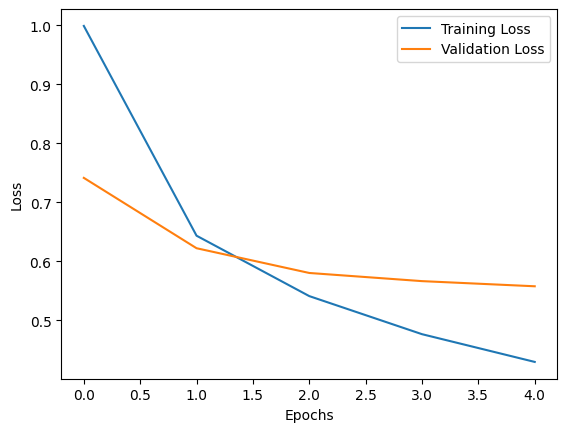

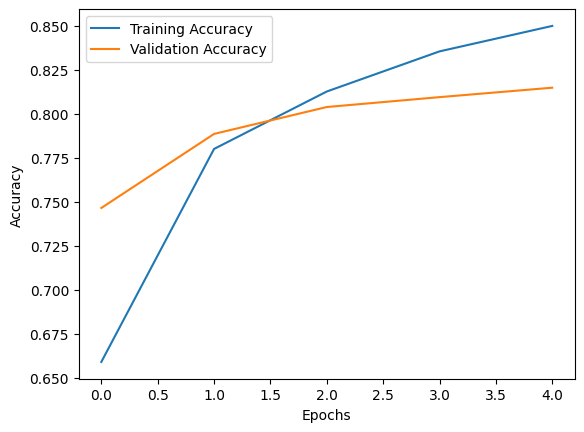

299/299 [==============================] - 30s 100ms/step - loss: 0.5259 - accuracy: 0.8201
Test Loss: 0.5258641242980957
Test Accuracy: 0.8201295733451843
299/299 [==============================] - 33s 101ms/step
F1 Score: 0.8205833206554928


In [129]:
# define evaluation metrics for deep learning models
def evaluate_model(LSTM_model, LSTM_history, int_test_ds, test_df):
    # Plot training and validation loss
    plt.plot(LSTM_history.history['loss'], label='Training Loss')
    plt.plot(LSTM_history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot training and validation accuracy
    plt.plot(LSTM_history.history['accuracy'], label='Training Accuracy')
    plt.plot(LSTM_history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Evaluate model on the test set
    loss, accuracy = LSTM_model.evaluate(int_test_ds)
    print("Test Loss:", loss)
    print("Test Accuracy:", accuracy)
    method['LSTM'] = accuracy * 100

    # Predict on the test set
    predictions = LSTM_model.predict(int_test_ds)
    predicted_labels = np.argmax(predictions, axis=1)

    # Calculate F1 score
    f1 = f1_score(test_df['Topic_group'], predicted_labels, average='weighted')
    print("F1 Score:", f1)


evaluate_model(LSTM_model, LSTM_history, int_test_ds, test_df)


In [130]:
# Tune the LSTM Model
LSTM_model = Sequential([
    embedding_layer,
    LSTM(units=64, return_sequences=True), 
    Dropout(0.5),  
    LSTM(units=32),  
    Dropout(0.3),  
    Dense(units=8, activation='softmax')
])

# Using Adam optimizer
optimizer = Adam(learning_rate=0.001)

# Compile the model
LSTM_model.compile(optimizer=optimizer,
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Model summary
LSTM_model.summary()

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)
]

# Fitting the model 
history = LSTM_model.fit(int_train_ds,
                         validation_data=int_val_ds,
                         epochs=10,  
                         batch_size=32,
                         callbacks=callbacks)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 100)         2000000   
                                                                 
 lstm_4 (LSTM)               (None, None, 64)          42240     
                                                                 
 dropout_3 (Dropout)         (None, None, 64)          0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 264       
                                                                 
Total params: 2,054,920
Trainable params: 54,920
Non-t

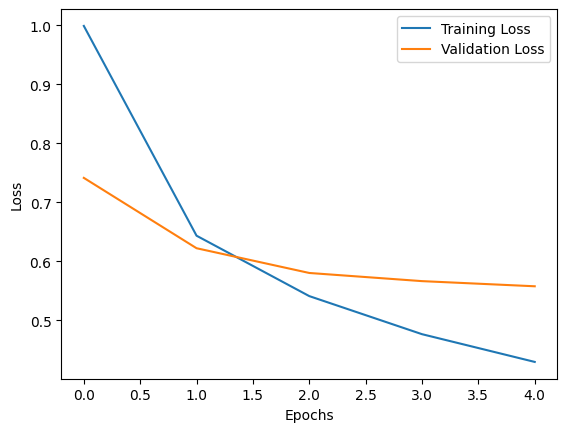

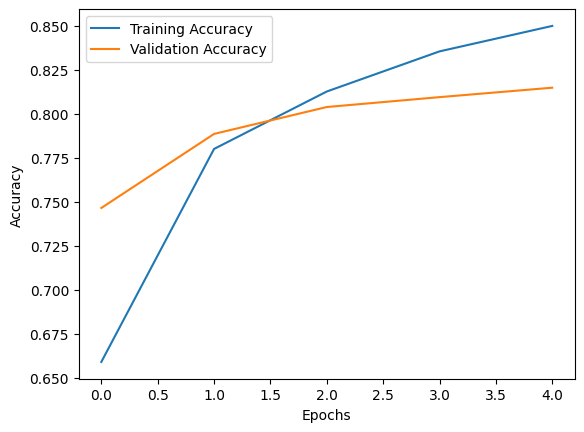

299/299 [==============================] - 52s 172ms/step - loss: 0.5008 - accuracy: 0.8375
Test Loss: 0.5008381009101868
Test Accuracy: 0.8374791145324707
299/299 [==============================] - 63s 175ms/step
F1 Score: 0.8374970571479686


In [131]:
# define evaluation metrics for deep learning models
def evaluate_model(LSTM_model, LSTM_history, int_test_ds, test_df):
    # Plot training and validation loss
    plt.plot(LSTM_history.history['loss'], label='Training Loss')
    plt.plot(LSTM_history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot training and validation accuracy
    plt.plot(LSTM_history.history['accuracy'], label='Training Accuracy')
    plt.plot(LSTM_history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Evaluate model on the test set
    loss, accuracy = LSTM_model.evaluate(int_test_ds)
    print("Test Loss:", loss)
    print("Test Accuracy:", accuracy)
    method['LSTM Tuned'] = accuracy * 100

    # Predict on the test set
    predictions = LSTM_model.predict(int_test_ds)
    predicted_labels = np.argmax(predictions, axis=1)

    # Calculate F1 score
    f1 = f1_score(test_df['Topic_group'], predicted_labels, average='weighted')
    print("F1 Score:", f1)


evaluate_model(LSTM_model, LSTM_history, int_test_ds, test_df)


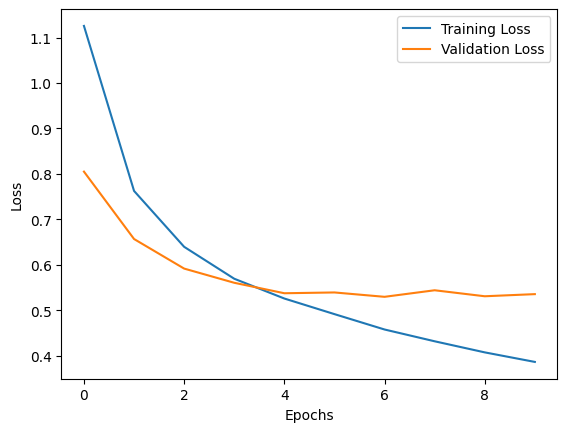

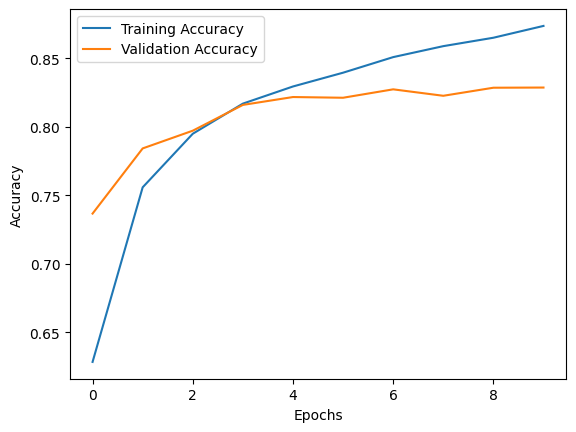

299/299 [==============================] - 53s 176ms/step - loss: 0.5008 - accuracy: 0.8375
Test Loss: 0.5008381009101868
Test Accuracy: 0.8374791145324707
299/299 [==============================] - 52s 173ms/step
F1 Score: 0.8374970571479686


In [132]:
# evaluate the model
evaluate_model(LSTM_model, history, int_test_ds, test_df)

In [133]:
# Train the model using GRU
def train_gru_model(embedding_layer, int_train_ds, train_df, int_val_ds, num_classes, epochs=5):
    # Define GRU model architecture
    gru_model = Sequential([
        embedding_layer,
        GRU(units=64, input_shape=(None, 500)),
        Dense(units=num_classes, activation='softmax')
    ])

    # Compile the model
    gru_model.compile(
        optimizer='RMSprop',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Compute class weights
    gru_class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_df['Topic_group']),
        y=train_df['Topic_group']
    )
    gru_class_weights_dict = dict(enumerate(gru_class_weights))

    # Fit the model using the training set
    gru_history = gru_model.fit(
        int_train_ds,
        epochs=epochs,
        class_weight=gru_class_weights_dict,
        validation_data=int_val_ds
    )

    return gru_model, gru_history

gru_model, gru_history = train_gru_model(embedding_layer, int_train_ds, train_df, int_val_ds, num_classes=8, epochs=5)


Epoch 1/5
957/957 [==============================] - 255s 259ms/step - loss: 1.0493 - accuracy: 0.5501 - val_loss: 0.8951 - val_accuracy: 0.6874
Epoch 2/5
957/957 [==============================] - 239s 249ms/step - loss: 0.5930 - accuracy: 0.7457 - val_loss: 0.7379 - val_accuracy: 0.7484
Epoch 3/5
957/957 [==============================] - 240s 250ms/step - loss: 0.4815 - accuracy: 0.7876 - val_loss: 0.6222 - val_accuracy: 0.7853
Epoch 4/5
957/957 [==============================] - 235s 245ms/step - loss: 0.4208 - accuracy: 0.8064 - val_loss: 0.5796 - val_accuracy: 0.8025
Epoch 5/5
957/957 [==============================] - 234s 244ms/step - loss: 0.3770 - accuracy: 0.8226 - val_loss: 0.5885 - val_accuracy: 0.8027


In [134]:
# define evaluation metrics 
def evaluate_model(LSTM_model, LSTM_history, int_test_ds, test_df):
    # Plot training and validation loss
    plt.plot(LSTM_history.history['loss'], label='Training Loss')
    plt.plot(LSTM_history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot training and validation accuracy
    plt.plot(LSTM_history.history['accuracy'], label='Training Accuracy')
    plt.plot(LSTM_history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Evaluate model on the test set
    loss, accuracy = LSTM_model.evaluate(int_test_ds)
    print("Test Loss:", loss)
    print("Test Accuracy:", accuracy)
    method['GRU'] = accuracy * 100

    # Predict on the test set
    predictions = LSTM_model.predict(int_test_ds)
    predicted_labels = np.argmax(predictions, axis=1)

    # Calculate F1 score
    f1 = f1_score(test_df['Topic_group'], predicted_labels, average='weighted')
    print("F1 Score:", f1)



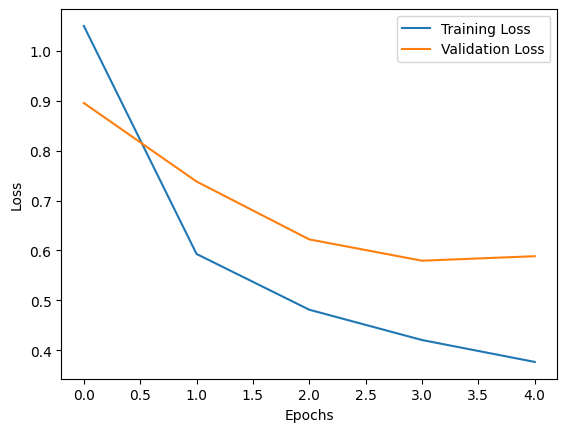

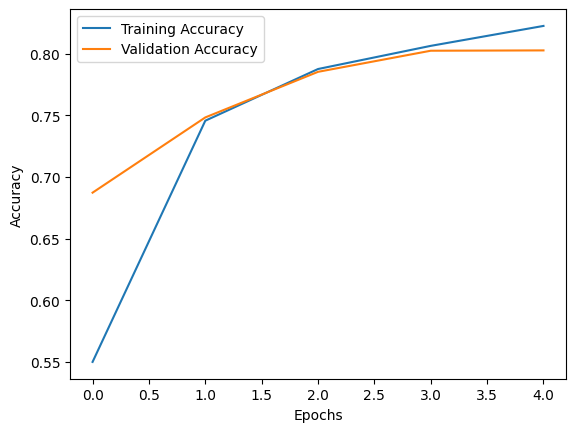

299/299 [==============================] - 25s 82ms/step - loss: 0.5731 - accuracy: 0.8062
Test Loss: 0.5731298923492432
Test Accuracy: 0.8062291145324707
299/299 [==============================] - 26s 80ms/step
F1 Score: 0.8085075781702294


In [135]:
evaluate_model(gru_model, gru_history, int_test_ds, test_df)

In [136]:
# Tune the model
def tuned_gru_model(embedding_layer, int_train_ds, train_df, int_val_ds, num_classes, epochs=10):
    # Define GRU model architecture
    gru_model = Sequential([
        embedding_layer,
        GRU(units=128),  # Increased units
        Dropout(0.5),    # Dropout added
        Dense(units=num_classes, activation='softmax')
    ])

    # Compile the model
    gru_model.compile(
        optimizer=RMSprop(lr=0.001),  # Adjust learning rate
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Compute class weights
    gru_class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_df['Topic_group']),
        y=train_df['Topic_group']
    )
    gru_class_weights_dict = dict(enumerate(gru_class_weights))

    # Fit the model 
    gru_history = gru_model.fit(
        int_train_ds,
        epochs=epochs,
        class_weight=gru_class_weights_dict,
        validation_data=int_val_ds,
        callbacks=[EarlyStopping(monitor='val_loss', patience=3)]  # Early stopping
    )

    return gru_model, gru_history


In [137]:
gru_model_tuned, gru_history_tuned = tuned_gru_model(embedding_layer, int_train_ds, train_df, int_val_ds, num_classes=8, epochs=5)

Epoch 1/5
957/957 [==============================] - 480s 495ms/step - loss: 1.0671 - accuracy: 0.5493 - val_loss: 0.7465 - val_accuracy: 0.7494
Epoch 2/5
957/957 [==============================] - 475s 496ms/step - loss: 0.6093 - accuracy: 0.7454 - val_loss: 0.6620 - val_accuracy: 0.7789
Epoch 3/5
957/957 [==============================] - 726s 758ms/step - loss: 0.5036 - accuracy: 0.7829 - val_loss: 0.5938 - val_accuracy: 0.8000
Epoch 4/5
 41/957 [>.............................] - ETA: 16:24 - loss: 0.4781 - accuracy: 0.7881

KeyboardInterrupt: 

In [ ]:
# define evaluation metrics for deep learning models
def evaluate_model(LSTM_model, LSTM_history, int_test_ds, test_df):
    # Plot training and validation loss
    plt.plot(LSTM_history.history['loss'], label='Training Loss')
    plt.plot(LSTM_history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot training and validation accuracy
    plt.plot(LSTM_history.history['accuracy'], label='Training Accuracy')
    plt.plot(LSTM_history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Evaluate model on the test set
    loss, accuracy = LSTM_model.evaluate(int_test_ds)
    print("Test Loss:", loss)
    print("Test Accuracy:", accuracy)
    method['GRU_Tuned'] = accuracy * 100

    # Predict on the test set
    predictions = LSTM_model.predict(int_test_ds)
    predicted_labels = np.argmax(predictions, axis=1)

    # Calculate F1 score
    f1 = f1_score(test_df['Topic_group'], predicted_labels, average='weighted')
    print("F1 Score:", f1)



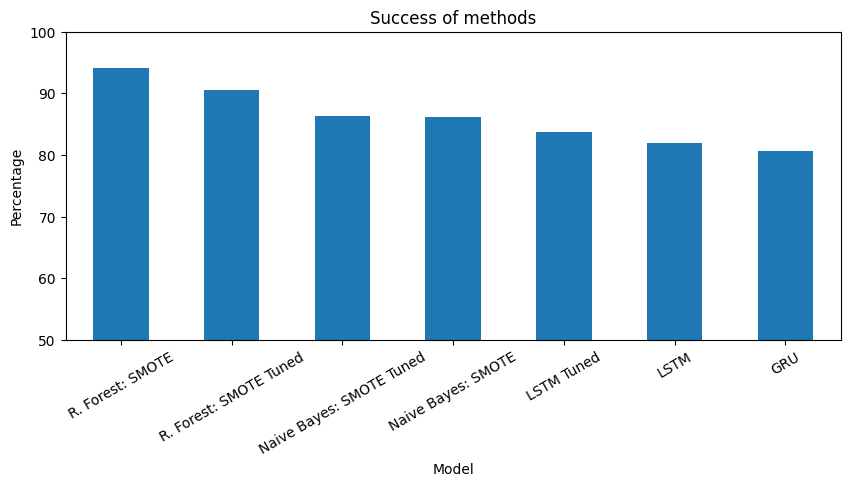

In [142]:
# Store and read the models dictionary as a pandas series
model_s = pd.Series(method)


# Sort the values in the models
model_s = model_s.sort_values(ascending=False)
plt.figure(figsize=(10,4))




axis = model_s.plot(kind='bar')
for p in axis.patches:
  # indicating the accuracy level of the models
  ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.ylim([50.0, 100.0])
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.xticks(rotation=30)
plt.title('Success of methods')
plt.savefig('model_success')
plt.show()
